In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log, dot, e
%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

##### For Building the Model #####
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

### Loading and Preprocessing Data

In [2]:
### Cancer dataset
df = pd.read_csv("lung_cancer_data.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)
print("Size of data:", df.shape)
df.head()

Size of data: (1000, 25)


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [3]:
predictor_df = df.copy()

In [4]:
predictor_df.drop(columns=['Frequent Cold', 'Dry Cough', 'Snoring'] , axis=1, inplace=True)
predictor_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Level
0,P1,33,1,2,4,5,4,3,2,2,...,2,2,4,3,4,2,2,3,1,Low
1,P10,17,1,3,1,5,3,4,2,2,...,4,2,3,1,3,7,8,6,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,3,4,8,8,7,9,2,1,4,High
3,P1000,37,1,7,7,7,7,6,7,7,...,7,7,8,4,2,3,1,4,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,7,7,9,3,2,4,1,4,2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,8,7,7,5,3,2,7,8,2,High
996,P996,37,2,6,8,7,7,7,6,7,...,8,7,7,9,6,5,7,2,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,3,4,8,8,7,9,2,1,4,High
998,P998,18,2,6,8,7,7,7,6,7,...,7,7,9,3,2,4,1,4,2,High


In [5]:
y = predictor_df.Level.values
x_data = predictor_df.drop(['Patient Id', 'Level'], axis = 1)
x_data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2
996,37,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4
997,25,2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4
998,18,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2


In [6]:
###Data Standardization
x_min = np.min(x_data, axis=0)
x_max = np.max(x_data, axis=0) 
x = (x_data - x_min)/(x_max- x_min).values
x

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails
0,0.322034,0.0,0.142857,0.428571,0.571429,0.428571,0.333333,0.166667,0.166667,0.500000,0.285714,0.142857,0.125,0.375,0.250,0.428571,0.125,0.142857,0.285714,0.000
1,0.050847,0.0,0.285714,0.000000,0.571429,0.285714,0.500000,0.166667,0.166667,0.166667,0.142857,0.428571,0.125,0.250,0.000,0.285714,0.750,1.000000,0.714286,0.125
2,0.355932,0.0,0.428571,0.571429,0.714286,0.571429,0.666667,0.500000,0.833333,1.000000,0.142857,0.285714,0.375,0.875,0.875,0.857143,1.000,0.142857,0.000000,0.375
3,0.389831,0.0,0.857143,0.857143,0.857143,0.857143,0.833333,1.000000,1.000000,1.000000,0.857143,0.857143,0.750,0.875,0.375,0.142857,0.250,0.000000,0.428571,0.500
4,0.542373,0.0,0.714286,1.000000,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,1.000000,0.857143,0.750,1.000,0.250,0.142857,0.375,0.000000,0.428571,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.508475,0.0,0.714286,0.857143,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,0.857143,1.000000,0.750,0.750,0.500,0.285714,0.125,0.857143,1.000000,0.125
996,0.389831,1.0,0.714286,1.000000,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,0.857143,1.000000,0.750,0.750,1.000,0.714286,0.500,0.857143,0.142857,0.375
997,0.186441,1.0,0.428571,0.571429,0.714286,0.571429,0.666667,0.500000,0.833333,1.000000,0.142857,0.285714,0.375,0.875,0.875,0.857143,1.000,0.142857,0.000000,0.375
998,0.067797,1.0,0.714286,1.000000,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,1.000000,0.857143,0.750,1.000,0.250,0.142857,0.375,0.000000,0.428571,0.125


In [7]:
### Split Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (750, 20)
y_train size: (750,)

x_test size: (250, 20)
y_test size: (250,)


### Setting Up Models

#### Logistic Regression

In [8]:
log_reg = LogisticRegression().fit(x_train, y_train)

#### Naive Bayes

In [9]:
gnb = GaussianNB().fit(x_train, y_train)

### Using models on dataset

#### Logistic Regression

In [10]:
log_y_train_pred = log_reg.predict(x_train)
accuracy_score(y_train, log_y_train_pred)

0.992

In [13]:
print(classification_report(y_train, log_y_train_pred, labels=log_reg.classes_))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       261
         Low       1.00      0.97      0.99       237
      Medium       0.98      1.00      0.99       252

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



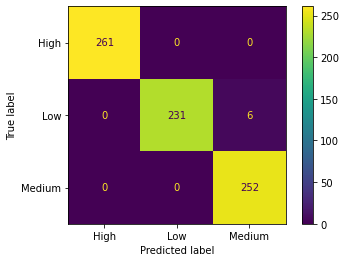

In [14]:
log_train_matrix = confusion_matrix(y_train, log_y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=log_train_matrix, display_labels=log_reg.classes_)
disp.plot()
plt.show()

In [15]:
log_y_test_pred = log_reg.predict(x_test)
accuracy_score(y_test, log_y_test_pred)

0.984

In [16]:
print(classification_report(y_test, log_y_test_pred, labels=log_reg.classes_))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       104
         Low       1.00      0.94      0.97        66
      Medium       0.95      1.00      0.98        80

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



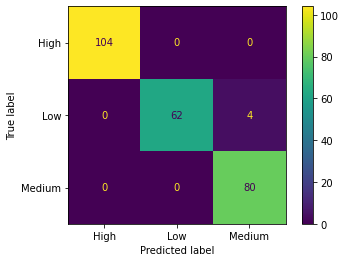

In [17]:
log_test_matrix = confusion_matrix(y_test, log_y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=log_test_matrix, display_labels=log_reg.classes_)
disp.plot()
plt.show()

<p>In the training set, the Logistic Regression model had an accuracy of 99.2% with with macro average of precision, recall, and f1-score all being 99%. The confusion matrix for the training set also showed us that the model had correctly identified all High and Low risk of lung cancer and only mislabeling 6 Medium risk of lung cancer as low risk. Meanwhile in the test set, the model had an accuracy of 98.4% with macro average of precision, recall, and f1-score all being 98%. Its confusion matrix shows us the same as the previous confusion matrix where it correctly identified both High and Low risk of lung cancer and only mislabeling 4 Medium risk of lung cancer as low risk. </p>
</p>This tells us that this model is highly accurate in its prediction and is very reliable to use as the model to identify a patient's likelihood of lung cancer. </p>

#### Naive Bayes

In [18]:
gnb_y_train_pred = gnb.predict(x_train)
accuracy_score(y_train, gnb_y_train_pred)

0.8493333333333334

In [20]:
print(classification_report(y_train, gnb_y_train_pred, labels=gnb.classes_))

              precision    recall  f1-score   support

        High       0.82      0.95      0.88       261
         Low       0.88      0.92      0.89       237
      Medium       0.86      0.69      0.76       252

    accuracy                           0.85       750
   macro avg       0.85      0.85      0.85       750
weighted avg       0.85      0.85      0.85       750



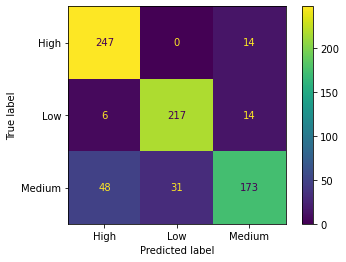

In [21]:
gnb_train_matrix = confusion_matrix(y_train, gnb_y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=gnb_train_matrix, display_labels=gnb.classes_)
disp.plot()
plt.show()

In [22]:
gnb_y_test_pred = gnb.predict(x_test)
accuracy_score(y_test, gnb_y_test_pred)

0.848

In [23]:
print(classification_report(y_test, gnb_y_test_pred, labels=gnb.classes_))

              precision    recall  f1-score   support

        High       0.86      0.94      0.90       104
         Low       0.85      0.85      0.85        66
      Medium       0.83      0.72      0.77        80

    accuracy                           0.85       250
   macro avg       0.85      0.84      0.84       250
weighted avg       0.85      0.85      0.85       250



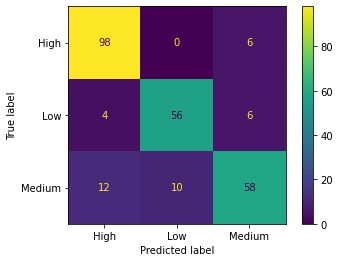

In [24]:
gnb_test_matrix = confusion_matrix(y_test, gnb_y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=gnb_test_matrix, display_labels=gnb.classes_)
disp.plot()
plt.show()

<p>In the training set, the Naive Bayes model had 84.93% accuracy with macro average precision, recall, f1-score of 85%. The confusion matrix also showed that it had correctly identified the majority of each class but had some misidentification in all classes where the highest mistake was 12 Medium risk being labeled as High by the model. Meanwhile in the testing set, it had an accuracy of 84.8% with macro average precision being 85% and both recall and f1-score being 84% </p>
<p>This shows that the Naive Bayes model is fairly accurate and is also a good model to predict the likelihood of lung cancer in a patient.</p>

### Which is better Logistic Regression or Naive Bayes for predicting lung cancer likelihood?

As can be seen above, Logistic Regression was the better model in predicting the level of lung cancer in both train and test sets. While this high accuracy of 99% may seem unrealistic, the precision, recall, and f1-scores has also had high results which shows that it can identify the classes correctly. Add to the fact that the dataset had close amount of each class, also rules out the imbalance  Therefore, it can be concluded that Logistic Regression is better in predicting lung cancer likelihood compared with Naive Bayes and further analysis of features will be made using the Logistic Regression model.

### See Weights

In [28]:
###Logistic Regression
print(predictor_df.columns)
print(log_reg.classes_)
print(log_reg.coef_)

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Level'],
      dtype='object')
['High' 'Low' 'Medium']
[[-0.43109729 -0.0158753   1.96043546  1.54054023 -0.19093447 -0.02937905
   0.3386353   0.84340818  1.40899758  1.84860302  0.61294049  2.54147184
  -0.07467239  2.01067658  3.17950641  1.59390585  1.62744026  0.32068648
   1.93745497  1.21069739]
 [-0.62286929  0.37065642 -0.73817849 -1.14844705 -0.82292255  0.10411514
  -0.9212164  -0.43767659 -0.33025062 -2.67474808  0.02151208 -1.71629518
   0.45434474 -1.51250244 -3.41448383 -0.28803272 -1.09634539 -2.69607003
  -2.55756277 -2.85894484]
 [ 1.05396658 -0.35478112 -1.22225697 -0.39209318  1.01

In [26]:
df2 = pd.DataFrame(log_reg.coef_, columns=x.columns)

In [30]:
df2.set_index(log_reg.classes_)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails
High,-0.431097,-0.015875,1.960435,1.540540,-0.190934,-0.029379,0.338635,0.843408,1.408998,1.848603,0.612940,2.541472,-0.074672,2.010677,3.179506,1.593906,1.627440,0.320686,1.937455,1.210697
Low,-0.622869,0.370656,-0.738178,-1.148447,-0.822923,0.104115,-0.921216,-0.437677,-0.330251,-2.674748,0.021512,-1.716295,0.454345,-1.512502,-3.414484,-0.288033,-1.096345,-2.696070,-2.557563,-2.858945
Medium,1.053967,-0.354781,-1.222257,-0.392093,1.013857,-0.074736,0.582581,-0.405732,-1.078747,0.826145,-0.634453,-0.825177,-0.379672,-0.498174,0.234977,-1.305873,-0.531095,2.375384,0.620108,1.648247
